You are in charge of monitoring the number of defective products from a specific factory. You’ve been told that the number of defects on a given day follows the Poisson distribution with the rate parameter (lambda) equal to 7. You’re new here, so you want to get a feel for what it means to follow the Poisson(7) distribution. You remember that the Poisson distribution is special because the rate parameter represents the expected value of the distribution, so in this case, the expected value of the Poisson(7) distribution is 7 defects per day.

You will investigate certain attributes of the Poisson(7) distribution to get an intuition for how many defective objects you should expect to see in a given amount of time. You will also practice and apply what you know about the Poisson distribution on a practice data set that you will simulate yourself.

In [1]:
import scipy.stats as stats
import numpy as np

* **Distribution in Theory**

In [2]:
lam = 7


You know that the rate parameter of a Poisson distribution is equal to the expected value. So in our factory, the rate parameter would equal the expected number of defects on a given day. You are curious about how often we might observe the exact expected number of defects.

In [3]:
# expected value = lam, probability of observing lam
print(stats.poisson.pmf(lam, lam)) # the probability of observing exactly lam defects on a given day

0.14900277967433773


The probability of observing exactly lam = 7 defects on a given day is almost 15% (expected value of defects = probability of observing specific values)

Our boss said that having 4 or fewer defects on a given day is an exceptionally good day. You are curious about how often that might happen.

In [4]:
# expected value = lam, probability of observing 4 or less
print(stats.poisson.cdf(4,lam))


0.17299160788207146


This means that there is roughly a 17.3% chance that there will be 4 or fewer defective products on a given day.

On the other hand, our boss said that having more than 9 defects on any given day is considered a bad day.

In [5]:
# expected value = lam, probability of observing 9 or more
print(1 - stats.poisson.cdf(9, lam))

0.16950406276132668


This means that there is roughly a 17% chance that there will be 9 or more defective products on any given day, and that day could be considered a bad day.

* **Distribution in Practice**


You’ve familiarized yourself a little bit about how the Poisson distribution works in theory by calculating different probabilities. But let’s look at what this might look like in practice.

In [7]:

# generate random variable for 365 values (1 year)
# stats.poisson.rvs(lambda, size = num_values)
year_defects = stats.poisson.rvs(lam, size = 365)
# first 20 values
print(year_defects[:20])

[ 8  4  7  7  5  3 11  7  4  5  5  8  6  7  4 11  8  7  7  6]


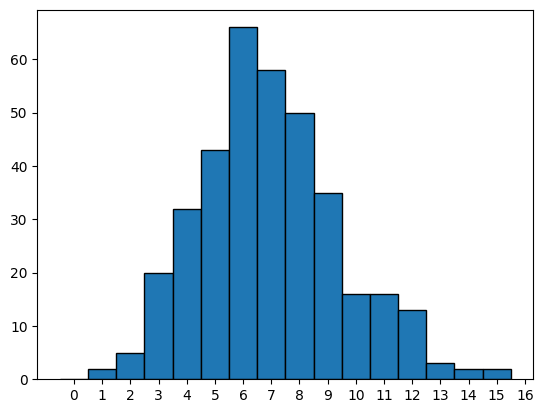

In [16]:
# We have preloaded a function histogram_function() that takes a list of random variables and plots them to a histogram.

from histogram_function import histogram_function
histogram_function(year_defects)


If we expect 7 defects on a given day, what is the total number of defects we would expect over 365 days?

In [8]:
print(lam*365)


2555


In [10]:
# the total sum of the data set year_defects
print(sum(year_defects))

2554


If we assume that we will have an average of 7 defects per day, then we can expect to have a total of 2555 defects in a year. However, since the number of defects each day is random, it's unlikely that we will have exactly 7 defects on any given day. In one scenario, we may have 2555 defects in total for the year (7 * 365). In another scenario, we may have an average of 2500 defects per year (if we run the cell with the variable 'year_defects', we will get different results each time).


Calculate and print the average number of defects per day from our simulated dataset.

In [11]:
print(year_defects.mean())


6.997260273972603


The value obtained is very close to 7, which confirms that throughout 365 observations, the expected value or average is 7.

When we refer to the expected value, we are talking about the average over many observations. This concept is closely related to the Law of Large Numbers, which states that as the number of samples increases, the probability of the samples resembling the true population also increases, and the mean of the samples approaches the expected value.

So even if there were 8 defects on one day, 3 on another day, and 11 on the day after that, in the long run, after many days, the expected value or average would still be 7.


You’re worried about what the highest amount of defects in a single day might be because that would be a hectic day.

In [12]:
print(year_defects.max())


17



Wow, it would probably be super busy if there were that many defects on a single day. Hopefully, it is a rare event!
Let's calculate the probability of observing that maximum value or more on a single day.

In [13]:
# expected value = lam, probability of observing the maximum value or more
print(1 - stats.poisson.cdf(year_defects.max(), lam))

0.00036178431660227606


The probability is almost 0% to observe the maximum value of defects in one day.

Let’s say we want to know how many defects in a given day would put us in the 90th percentile of the Poisson(7) distribution.

In [14]:
# stats.poisson.ppf(percentile, lambda)
print(stats.poisson.ppf(0.9, lam))

10.0


**percentile** is equal to the desired percentile (a decimal between 0 and 1), and **lambda** is the lambda parameter of the Poisson distribution. This function is essentially the inverse of the CDF.

The number of defects that would put us in the 90th percentile for a given day is 10. In other words, on 90% of days, we will observe fewer defects than this number (10).

Now let’s see what proportion of our simulated dataset year_defects is greater than or equal to the number we calculated in the previous step. By definition of a percentile, we would expect 1 - .90, or about 10% of days to be in this range.

In [15]:
print(sum(year_defects >= stats.poisson.ppf(0.9, lam))/ len(year_defects))

0.14794520547945206


The **numerator** tells us how many values in year_defects are greater than or equal to 10. Then we divide this value by the number of observations in the data set, which is 365, to get the proportion of days that have more than 10 defects. This proportion is almost 15%. This means that 15% of days have more than 10 defective products per day.